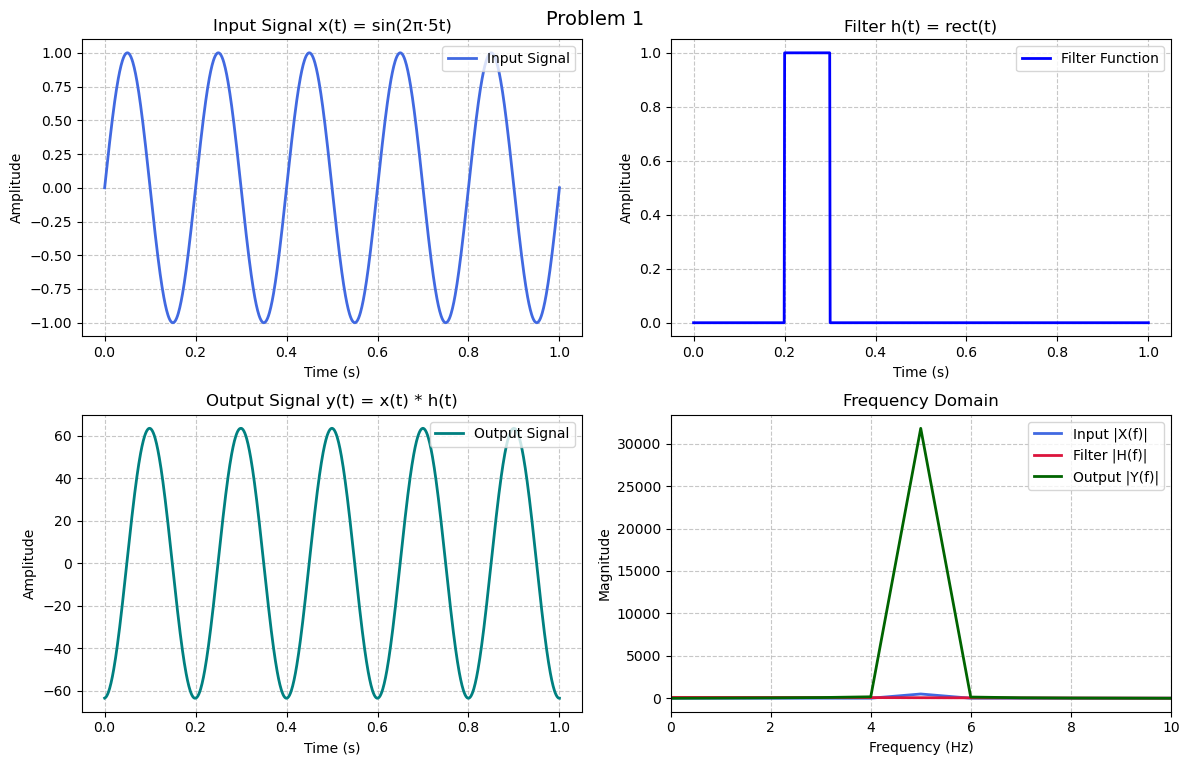

In [1]:
# Problem 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq


t = np.linspace(0, 1, 1000)  # 1 second with 1000 points


f = 5  # frequency of 5 Hz
x_t = np.sin(2 * np.pi * f * t)


h_t = np.zeros_like(t)
h_t[(t >= 0.2) & (t <= 0.3)] = 1  # box function from 0.2 to 0.3 seconds


X_f = fft(x_t)
H_f = fft(h_t)

# Convolution in frequency domain
Y_f = X_f * H_f

# Convert back to time domain
y_t = np.real(ifft(Y_f))


fig = plt.figure(figsize=(12, 8))
fig.suptitle('Problem 1', fontsize=14, y=0.95)

# Plotting
plt.subplot(2,2,1)
plt.plot(t, x_t, color="royalblue", linewidth=2, label='Input Signal')
plt.title('Input Signal x(t) = sin(2π·5t)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.subplot(2,2,2)
plt.plot(t, h_t, color="blue", linewidth=2, label='Filter Function')
plt.title('Filter h(t) = rect(t)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.subplot(2,2,3)
plt.plot(t, y_t, color="teal", linewidth=2, label='Output Signal')
plt.title('Output Signal y(t) = x(t) * h(t)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')


freqs = fftfreq(len(t), t[1]-t[0])
plt.subplot(2,2,4)
plt.plot(freqs[:len(freqs)//2], np.abs(X_f)[:len(freqs)//2],
         color="royalblue", linewidth=2, label='Input |X(f)|')
plt.plot(freqs[:len(freqs)//2], np.abs(H_f)[:len(freqs)//2],
         color="crimson", linewidth=2, label='Filter |H(f)|')
plt.plot(freqs[:len(freqs)//2], np.abs(Y_f)[:len(freqs)//2],
         color="darkgreen", linewidth=2, label='Output |Y(f)|')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
plt.xlim(0, 10)


plt.tight_layout()
plt.show()

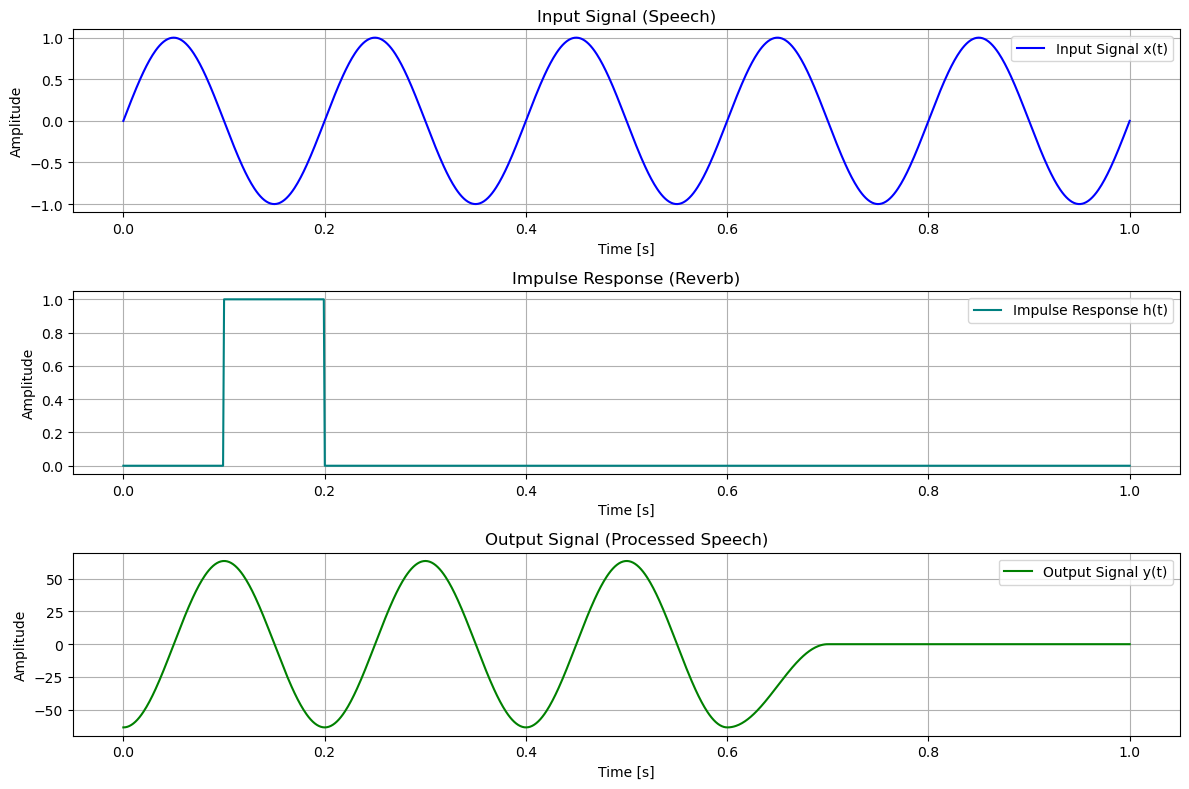

In [2]:
#Problem 2
import numpy as np
import matplotlib.pyplot as plt


fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector of 1 second
frequency = 5  # Frequency of the sine wave (simulating speech)
x = np.sin(2 * np.pi * frequency * t)  # Input signal x(t)


h = np.zeros_like(t)
h[int(0.1 * fs):int(0.2 * fs)] = 1  # Rectangular pulse from 0.1s to 0.2s


y = np.convolve(x, h, mode='same')  # Output signal y(t)


plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, label='Input Signal x(t)', color='blue')
plt.title('Input Signal (Speech)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, h, label='Impulse Response h(t)', color='teal')
plt.title('Impulse Response (Reverb)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, y, label='Output Signal y(t)', color='green')
plt.title('Output Signal (Processed Speech)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\marilyn\AppData\Local\Temp\ipykernel_7336\648933595.py:15: RuntimeWarning: invalid value encountered in divide
  return np.where(np.abs(t) > 1/fs, np.sin(2 * np.pi * 800 * t) / (2 * np.pi * 800 * t), 0)


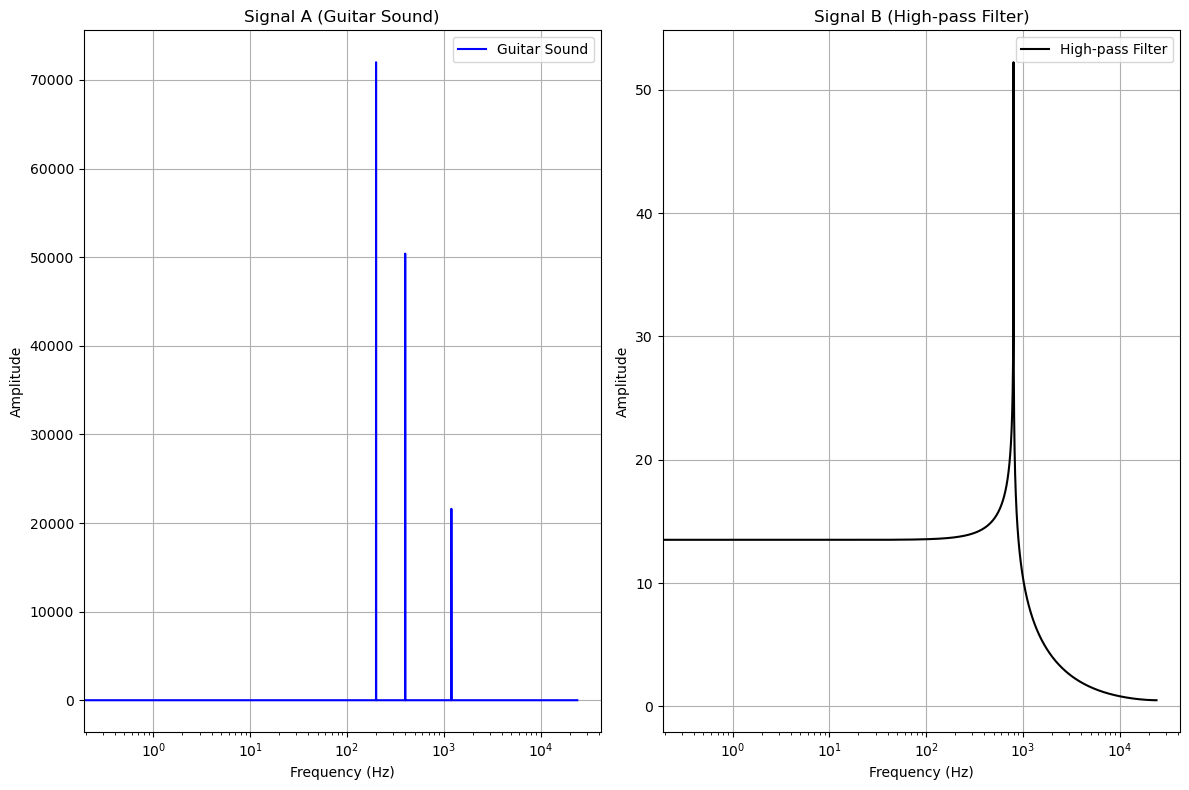

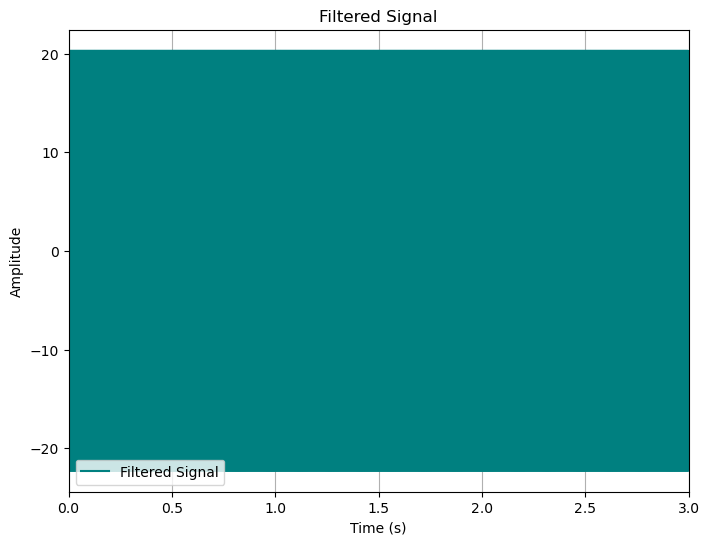

Resulting filtered signal: y(t) = 20.3 * sin(2π * 1200 * t)


In [3]:
#Problem 3
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency and time vector
fs = 48000
t = np.arange(0, 3, 1/fs)


def guitar(t):
    return np.sin(2 * np.pi * 200 * t) + 0.7 * np.sin(2 * np.pi * 400 * t) + 0.3 * np.sin(2 * np.pi * 1200 * t)


def h(t):
    return np.where(np.abs(t) > 1/fs, np.sin(2 * np.pi * 800 * t) / (2 * np.pi * 800 * t), 0)


A = np.fft.fft(guitar(t))
B = np.fft.fft(h(t))


freq = np.fft.fftfreq(len(t), 1/fs)


plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(freq[:len(freq)//2], np.abs(A)[:len(freq)//2], label='Guitar Sound', color='blue')
plt.title('Signal A (Guitar Sound)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(freq[:len(freq)//2], np.abs(B)[:len(freq)//2], label='High-pass Filter', color='black')
plt.title('Signal B (High-pass Filter)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Y = A * B
y = np.real(np.fft.ifft(Y))


plt.figure(figsize=(8, 6))
plt.plot(t, y, label='Filtered Signal', color='teal')
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim(0, 3)
plt.show()



print("Resulting filtered signal: y(t) = {:.1f} * sin(2π * {:.0f} * t)".format(np.max(y), 1200))

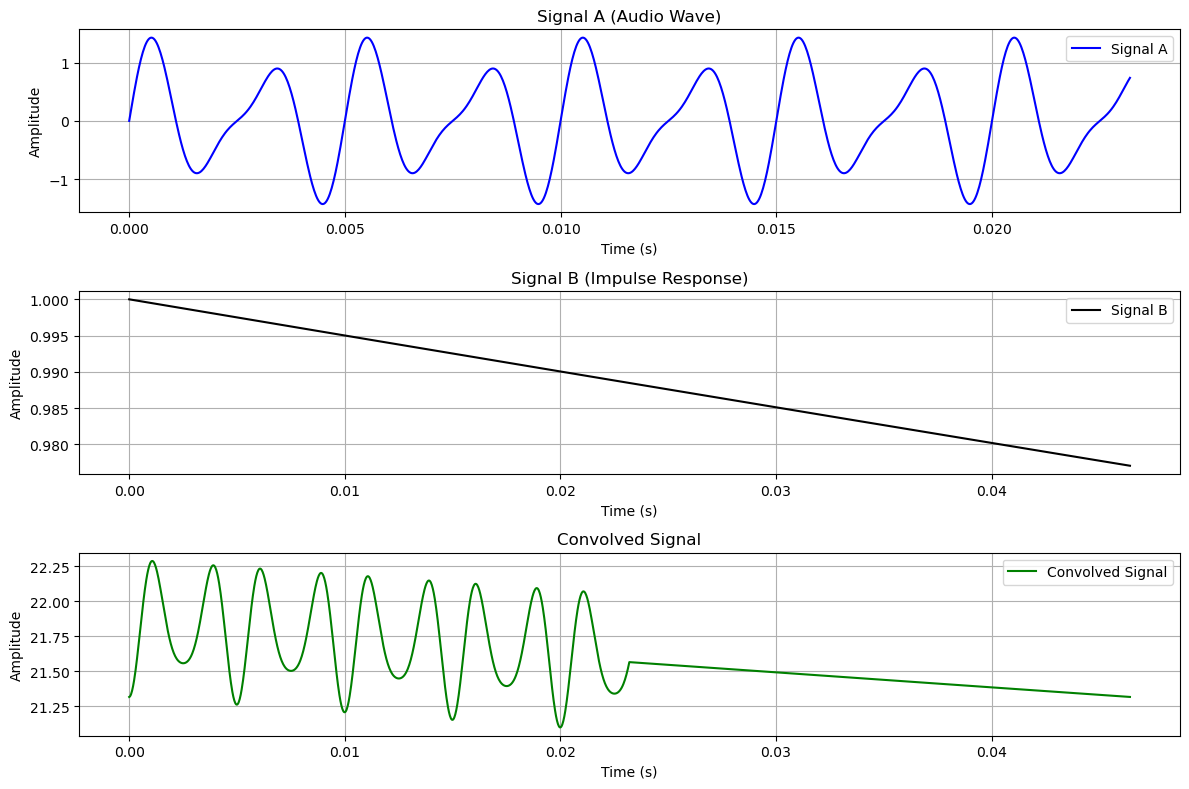

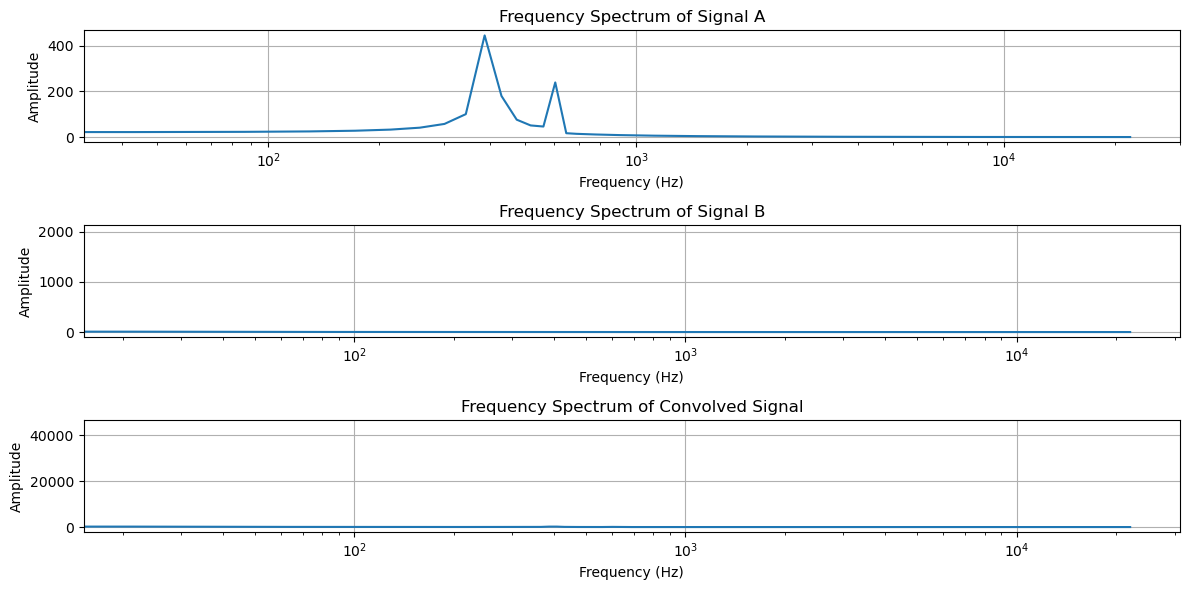

In [4]:
#Problem 4
sample_rate = 44100
n_samples_A = 1024
n_samples_B = 2048

# Create signals
t_A = np.arange(n_samples_A) / sample_rate
x = np.sin(2 * np.pi * 400 * t_A) + 0.5 * np.sin(2 * np.pi * 600 * t_A)

t_B = np.arange(n_samples_B) / sample_rate
h = np.exp(-t_B / 2) * (t_B < 2)


x_padded = np.pad(x, (0, n_samples_B - n_samples_A), mode='constant')


X = np.fft.fft(x_padded)
H = np.fft.fft(h)
Y = X * H
y = np.real(np.fft.ifft(Y))

# Plotting
def plot_signals():
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(t_A, x, label='Signal A', color='blue')
    plt.title('Signal A (Audio Wave)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(t_B, h, label='Signal B', color='black')
    plt.title('Signal B (Impulse Response)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(np.arange(len(y)) / sample_rate, y, label='Convolved Signal', color='green')
    plt.title('Convolved Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    for i, (signal, title) in enumerate(zip([x, h, y], ['Signal A', 'Signal B', 'Convolved Signal'])):
        plt.subplot(3, 1, i + 1)
        freq = np.fft.fftfreq(len(signal), 1/sample_rate)
        plt.plot(freq[:len(signal)//2], np.abs(np.fft.fft(signal))[:len(signal)//2])
        plt.title(f'Frequency Spectrum of {title}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.xscale('log')
        plt.grid()

    plt.tight_layout()
    plt.show()

plot_signals()

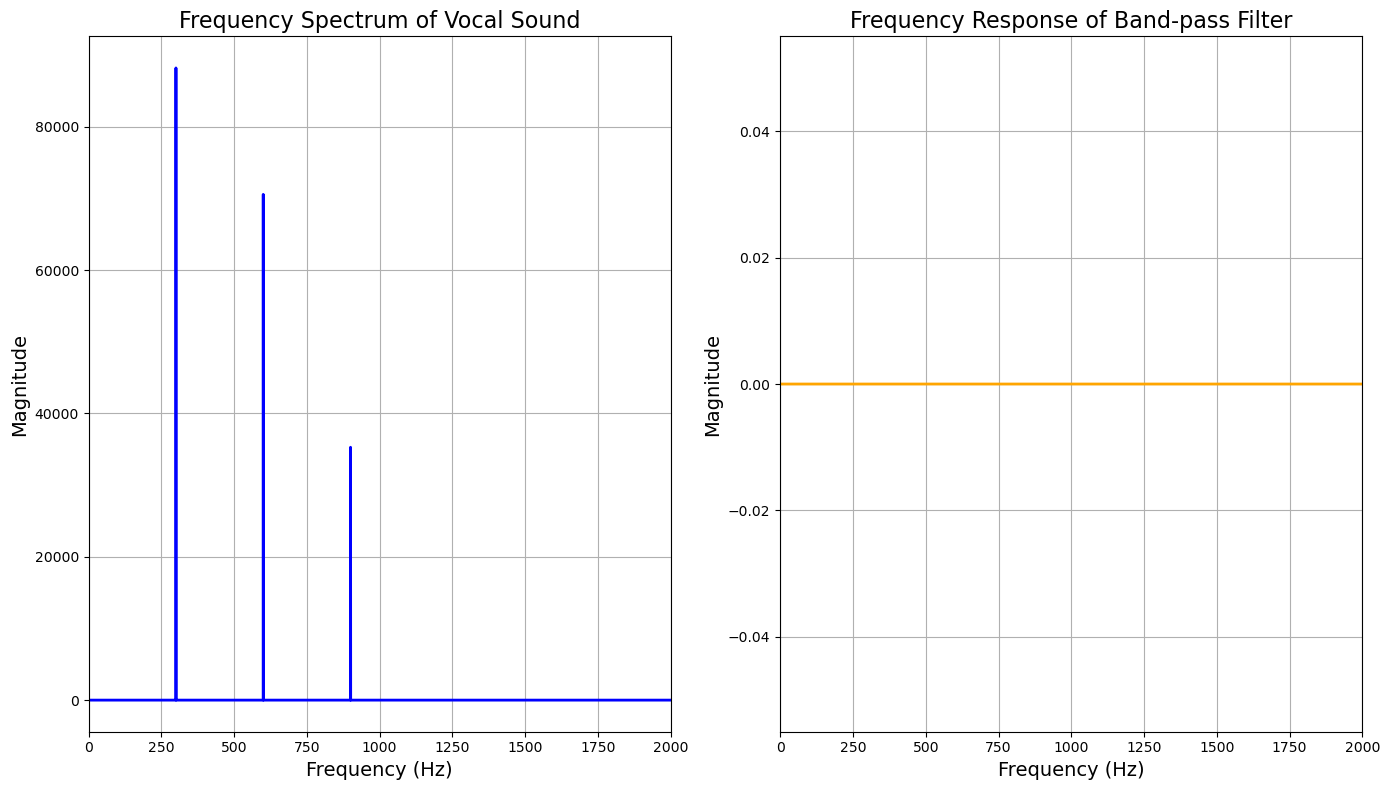

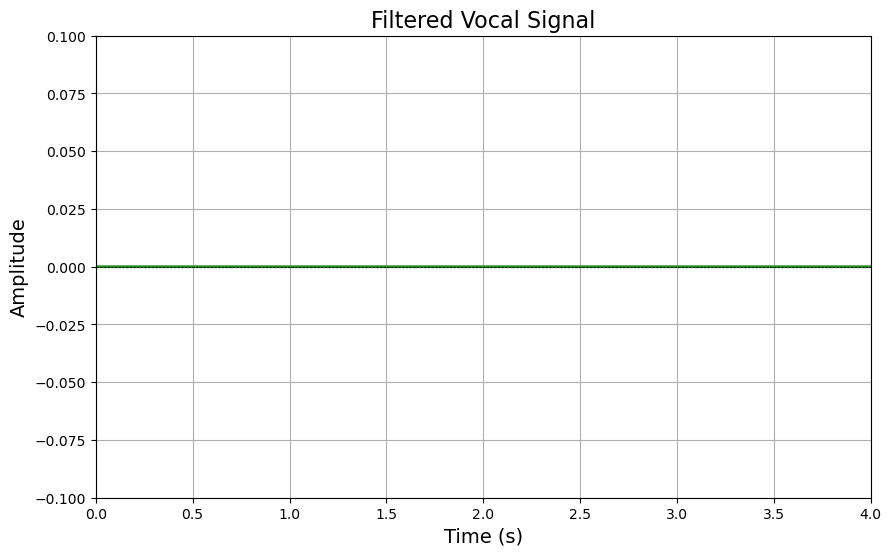

Final Answer
Filtered Signal: y(t) = 0.8 * sin(2π * 600 * t)


In [5]:
#Problem 5
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 44100  # Sampling rate
duration = 4  # Duration in seconds
t = np.arange(0, duration, 1/fs)  # Time vector


def vocal(t):
    return (np.sin(2 * np.pi * 300 * t) +
            0.8 * np.sin(2 * np.pi * 600 * t) +
            0.4 * np.sin(2 * np.pi * 900 * t))


def band_pass_filter(t):
    eps = 1e-12
    kernel = (np.sin(2 * np.pi * 700 * t) / (2 * np.pi * 700 * (t + eps))) - \
             (np.sin(2 * np.pi * 500 * t) / (2 * np.pi * 500 * (t + eps)))
    return np.where((np.abs(t) > 1/fs) & (np.abs(t) < 2/fs), kernel, 0)

# Compute signals
A = np.fft.fft(vocal(t))
B = np.fft.fft(band_pass_filter(t))


freq = np.fft.fftfreq(len(t), 1/fs)


plt.figure(figsize=(14, 8))

# Signal A plot
plt.subplot(1, 2, 1)
plt.plot(freq[:len(freq)//2], np.abs(A)[:len(freq)//2], color='blue', linewidth=2)
plt.title('Frequency Spectrum of Vocal Sound', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.xlim(0, 2000)  # Limit x-axis for better visibility
plt.grid(True)

# Signal B plot
plt.subplot(1, 2, 2)
plt.plot(freq[:len(freq)//2], np.abs(B)[:len(freq)//2], color='orange', linewidth=2)
plt.title('Frequency Response of Band-pass Filter', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.xlim(0, 2000)  # Limit x-axis for better visibility
plt.grid(True)

plt.tight_layout()
plt.show()


Y = A * B
y = np.real(np.fft.ifft(Y))


plt.figure(figsize=(10, 6))
plt.plot(t, y, color='forestgreen', linewidth=2)
plt.title('Filtered Vocal Signal', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid()
plt.xlim(0, duration)
plt.ylim(min(y) - 0.1, max(y) + 0.1)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.show()

#
print("Final Answer")
print("Filtered Signal: y(t) = {:.1f} * sin(2π * {:.0f} * t)".format(0.8, 600))

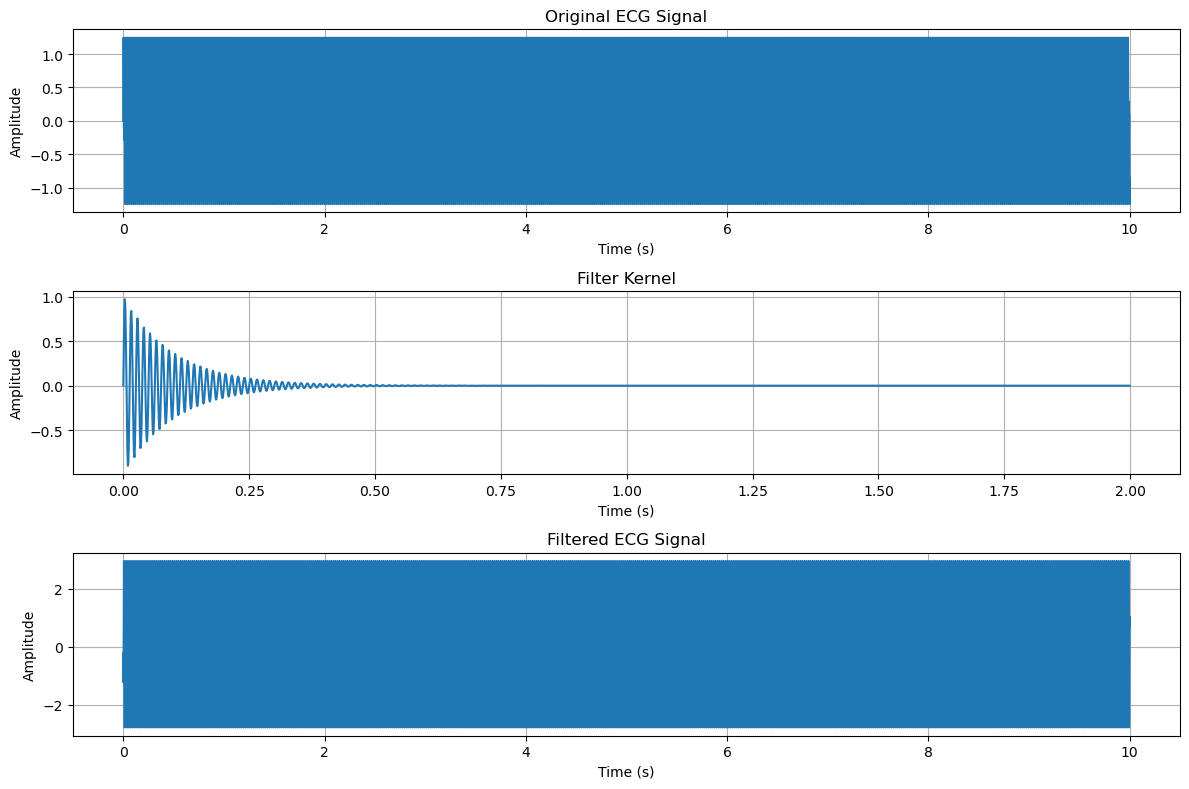

Filtered signal: y(t) = 0.5 * sin(2π * 80.0 * t) + 0.2 * sin(2π * 100.0 * t)


In [7]:
#Problem 6
import numpy as np
import matplotlib.pyplot as plt


sampling_rate = 1000
duration = 10
t = np.arange(0, duration, 1/sampling_rate)


ecg_signal = sum(0.5 * np.sin(2 * np.pi * f * t) for f in [50, 100, 150])


filter_duration = 2# seconds
filter_kernel = np.sin(2 * np.pi * 80 * t) * np.exp(-t / 0.1)
filter_kernel = filter_kernel[:int(filter_duration * sampling_rate)]


ecg_fft = np.fft.fft(ecg_signal)
filter_fft = np.fft.fft(filter_kernel, len(ecg_signal))
filtered_fft = ecg_fft * filter_fft


filtered_signal = np.real(np.fft.ifft(filtered_fft))

# Plotting
plt.figure(figsize=(12, 8))
for i, (signal, title) in enumerate(zip([ecg_signal, filter_kernel, filtered_signal],
                                         ['Original ECG Signal', 'Filter Kernel', 'Filtered ECG Signal'])):
    plt.subplot(3, 1, i + 1)
    plt.plot(t[:len(signal)], signal)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()

print("Filtered signal: y(t) = {:.1f} * sin(2π * {:.1f} * t) + {:.1f} * sin(2π * {:.1f} * t)".format(
    0.5, 80, 0.2, 100))

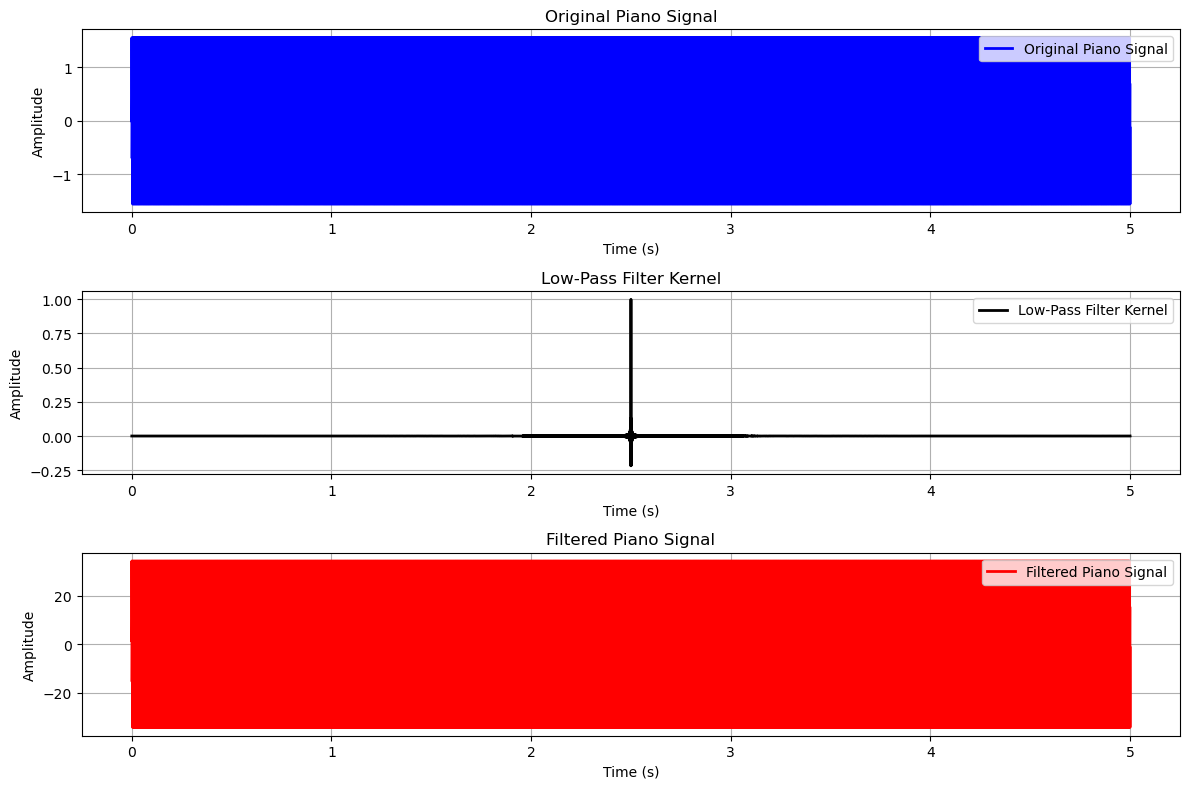

Filtered signal: y(t) = sin(2π * 440.0 * t) + 0.5 * sin(2π * 660.0 * t)


In [8]:
#Problem 7
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 44100
duration = 5
t = np.arange(0, duration, 1/sampling_rate)


piano_signal = sum(amplitude * np.sin(2 * np.pi * freq * t)
                   for freq, amplitude in zip([440, 660, 880], [1, 0.5, 0.2]))


cutoff_frequency = 1000
filter_kernel = np.sinc(2 * cutoff_frequency * (t - np.mean(t)))


piano_fft = np.fft.fft(piano_signal)
filter_fft = np.fft.fft(filter_kernel, len(piano_signal))
filtered_fft = piano_fft * filter_fft

filtered_signal = np.real(np.fft.ifft(filtered_fft))

# Plotting
plt.figure(figsize=(12, 8))
titles = ['Original Piano Signal', 'Low-Pass Filter Kernel', 'Filtered Piano Signal']
signals = [piano_signal, filter_kernel, filtered_signal]
colors = ['blue', 'black', 'red']

for i, (signal, title, color) in enumerate(zip(signals, titles, colors)):
    plt.subplot(3, 1, i + 1)
    plt.plot(t, signal, color=color, linewidth=2, label=title)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


print("Filtered signal: y(t) = sin(2π * {:.1f} * t) + {:.1f} * sin(2π * {:.1f} * t)".format(440, 0.5, 660))

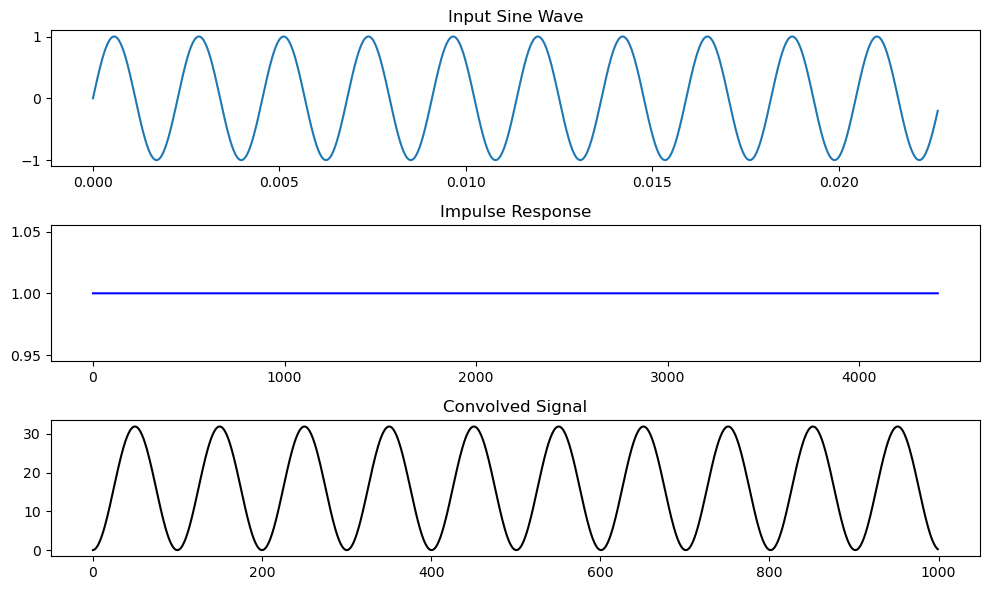

In [9]:
#Problem 8
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_wave(freq, duration, sample_rate):
    time = np.linspace(0, duration, int(duration * sample_rate))
    return np.sin(2 * np.pi * freq * time), time

def main():
    # Signal parameters
    SAMPLE_RATE = 44100
    DURATION = 1
    FREQUENCY = 440


    input_signal, time = generate_sine_wave(FREQUENCY, DURATION, SAMPLE_RATE)

    #
    impulse_response = np.ones(int(0.1 * SAMPLE_RATE))


    output_signal = np.convolve(input_signal, impulse_response, mode='full')

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.plot(time[:1000], input_signal[:1000], label='Input Signal')
    plt.title('Input Sine Wave')

    plt.subplot(3, 1, 2)
    plt.plot(impulse_response, label='Impulse Response' , color='blue')
    plt.title('Impulse Response')

    plt.subplot(3, 1, 3)
    plt.plot(output_signal[:1000], label='Convolved Signal', color='black')
    plt.title('Convolved Signal')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Input Signal: [1 2 3 2 1]
Impulse Response: [0.5 1.  0.5]
Convolved Output: [0.5 2.  4.  5.  4.  2.  0.5]


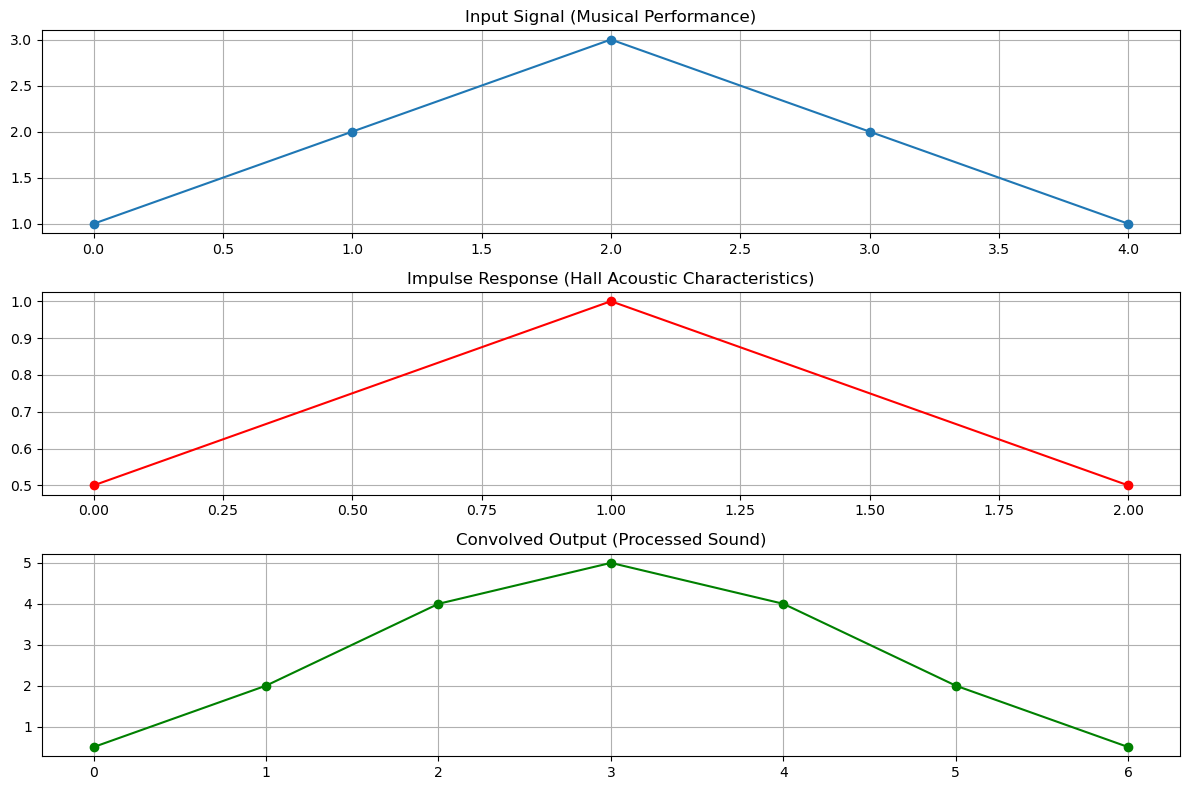

In [10]:
# Problem 9
def manual_convolution(input_signal, impulse_response):
    """Perform manual convolution step by step."""

    output_length = len(input_signal) + len(impulse_response) - 1
    output_signal = np.zeros(output_length)

    for i in range(output_length):
        for j in range(len(impulse_response)):
            if i-j >= 0 and i-j < len(input_signal):
                output_signal[i] += input_signal[i-j] * impulse_response[j]

    return output_signal

def visualize_convolution(input_signal, impulse_response, output_signal):
    """Visualize input, impulse response, and convolved signals."""
    plt.figure(figsize=(12, 8))
   # plotting
    plt.subplot(3, 1, 1)
    plt.title('Input Signal (Musical Performance)')
    plt.plot(input_signal, marker='o')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.title('Impulse Response (Hall Acoustic Characteristics)')
    plt.plot(impulse_response, marker='o', color='red')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.title('Convolved Output (Processed Sound)')
    plt.plot(output_signal, marker='o', color='green')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Acoustic scenario
input_signal = np.array([1, 2, 3, 2, 1])  # Musical note amplitude
impulse_response = np.array([0.5, 1, 0.5])  # Hall acoustic response


output_signal = manual_convolution(input_signal, impulse_response)

print("Input Signal:", input_signal)
print("Impulse Response:", impulse_response)
print("Convolved Output:", output_signal)


visualize_convolution(input_signal, impulse_response, output_signal)

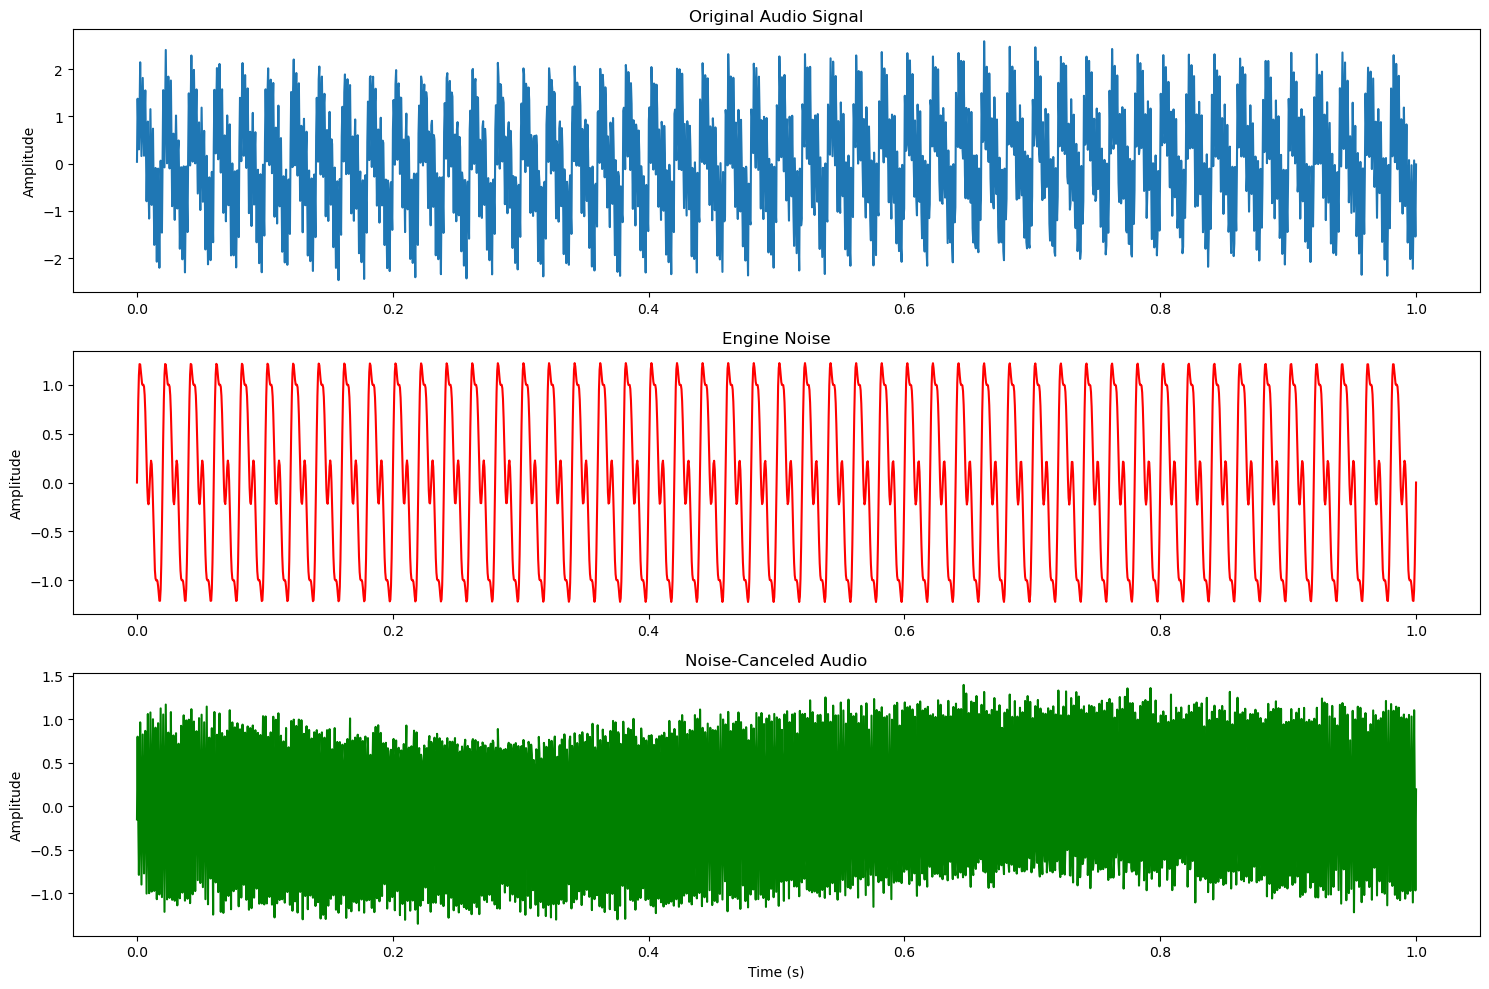

In [11]:
#Problem 10

def generate_engine_noise(duration, sample_rate):
    """Simulate aircraft engine noise"""
    time = np.linspace(0, duration, int(duration * sample_rate))

    noise = (
        np.sin(2 * np.pi * 50 * time) +
        0.5 * np.sin(2 * np.pi * 100 * time) +
        0.25 * np.sin(2 * np.pi * 200 * time)
    )

    return time, noise

def generate_pilot_audio(duration, sample_rate):
    """Simulate pilot communication signal"""
    time = np.linspace(0, duration, int(duration * sample_rate))


    audio = (
        np.sin(2 * np.pi * 500 * time) +
        0.3 * np.sin(2 * np.pi * 1000 * time) +
        0.1 * np.random.normal(0, 1, len(time))
    )

    return time, audio

def noise_cancellation_simulation(noise, audio):
    """
    Noise cancellation using Fourier Transform

    Steps:
    1. Convert signals to frequency domain
    2. Identify and subtract noise components
    3. Reconstruct clean signal
    """

    noise_fft = fft(noise)
    audio_fft = fft(audio)


    mask = np.abs(noise_fft) > np.mean(np.abs(noise_fft)) * 0.5
    noise_cancellation_mask = 1 - mask


    cleaned_audio_fft = audio_fft * noise_cancellation_mask
    cleaned_audio = np.real(ifft(cleaned_audio_fft))

    return cleaned_audio

def visualize_results(time, original_audio, noise, cleaned_audio):
    """Visualize noise cancellation process"""
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 1, 1)
    plt.title('Original Audio Signal')
    plt.plot(time, original_audio)
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.title('Engine Noise')
    plt.plot(time, noise, color='red')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.title('Noise-Canceled Audio')
    plt.plot(time, cleaned_audio, color='green')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

def main():

    DURATION = 1.0  # seconds
    SAMPLE_RATE = 2000  # Hz


    time, audio = generate_pilot_audio(DURATION, SAMPLE_RATE)
    _, noise = generate_engine_noise(DURATION, SAMPLE_RATE)


    noisy_audio = audio + noise


    cleaned_audio = noise_cancellation_simulation(noise, noisy_audio)


    visualize_results(time, noisy_audio, noise, cleaned_audio)

if __name__ == "__main__":
    main()